In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/model-molhiv/99.ckpt
/kaggle/input/pytorch-geometric-packages/torch_scatter-2.1.2-cp310-cp310-linux_x86_64.whl
/kaggle/input/pytorch-geometric-packages/torch_geometric-2.5.3-py3-none-any.whl
/kaggle/input/pytorch-geometric-packages/torch_cluster-1.6.3-cp310-cp310-linux_x86_64.whl
/kaggle/input/pytorch-geometric-packages/torch_spline_conv-1.2.2-cp310-cp310-linux_x86_64.whl
/kaggle/input/pytorch-geometric-packages/torch_sparse-0.6.18-cp310-cp310-linux_x86_64.whl


In [3]:
!git clone https://github.com/rampasek/GraphGPS.git

Cloning into 'GraphGPS'...
remote: Enumerating objects: 526, done.
remote: Counting objects: 100% (350/350), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 526 (delta 271), reused 241 (delta 241), pack-reused 176 (from 1)
Receiving objects: 100% (526/526), 12.93 MiB | 26.26 MiB/s, done.
Resolving deltas: 100% (337/337), done.


In [3]:
%cd /kaggle/working/GraphGPS

/kaggle/working/GraphGPS


##  installation for slurm if needed using conda 

In [2]:
# # for slurm if needed using conda 
# conda create -n graphgps python=3.10
# conda activate graphgps

# conda install pytorch=1.13 torchvision torchaudio pytorch-cuda=11.7 -c pytorch -c nvidia
# conda install pyg=2.2 -c pyg -c conda-forge
# pip install pyg-lib -f https://data.pyg.org/whl/torch-1.13.0+cu117.html

# # RDKit is required for OGB-LSC PCQM4Mv2 and datasets derived from it.  
# conda install openbabel fsspec rdkit -c conda-forge

# pip install pytorch-lightning yacs torchmetrics
# pip install performer-pytorch
# pip install tensorboardX
# pip install ogb
# pip install wandb

# conda clean --all

# installation for kaggle

In [ ]:
# Check existing environment
import sys
print("Python version:", sys.version)
import torch
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)

!pip uninstall -y torch torchvision torchaudio
!pip install torch==2.4.0+cu118 torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

!pip install torch==2.4.0+cu118 torch_geometric

# Optional dependencies:
#17.10 23:24 - !pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.4.0+cu124.html
!pip install torch==2.4.0+cu118  pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.4.0+cu118.html
# Install other required packages
!pip install torch==2.4.0+cu118  pytorch-lightning yacs torchmetrics
!pip install torch==2.4.0+cu118  performer-pytorch
!pip install tensorboardX
!pip install ogb
!pip install wandb

# Attempt to install RDKit (may have limitations)
!pip install rdkit-pypi
# !pip install openbabel fsspec
!pip install  fsspec

# Clean up pip cache (optional)
!pip cache purge

Python version: 3.10.14 | packaged by conda-forge | (main, Mar 20 2024, 12:45:18) [GCC 12.3.0]
PyTorch version: 2.4.0
CUDA available: True
CUDA version: 12.3
Found existing installation: torch 2.4.0
Uninstalling torch-2.4.0:
  Successfully uninstalled torch-2.4.0
Found existing installation: torchvision 0.19.0
Uninstalling torchvision-0.19.0:
  Successfully uninstalled torchvision-0.19.0
Found existing installation: torchaudio 2.4.0
Uninstalling torchaudio-2.4.0:
  Successfully uninstalled torchaudio-2.4.0
Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.7/857.7 MB 1.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 72.4 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 85.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 64.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 47.2 MB/s eta

In [ ]:
"""
# Check existing environment
import sys
print("Python version:", sys.version)
import torch
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)

!pip uninstall -y torch torchvision torchaudio
!pip install torch==2.0.1+cu118 torchvision==0.15.2+cu118 torchaudio==2.0.2+cu118 --index-url https://download.pytorch.org/whl/cu118

!pip install torch_geometric

# Optional dependencies:
!pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.4.0+cu124.html 
# Install other required packages
!pip install pytorch-lightning yacs torchmetrics
!pip install performer-pytorch
!pip install tensorboardX
!pip install ogb
!pip install wandb

# Attempt to install RDKit (may have limitations)
!pip install rdkit-pypi
# !pip install openbabel fsspec
!pip install  fsspec

# Clean up pip cache (optional)
!pip cache purge
0.1+cu118 torchvision==0.15.2+cu118 torchaudio==2.0.2+cu118 --index-url https://download.pytorch.org/whl/cu118

!pip install torch_geometric

# Optional dependencies:
#17.10 23:24 - !pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.4.0+cu124.html
!pip install 2.0.1+cu118  0.1+cu118.html
# Install other required packages
!pip install 2.0.1+cu118  2.0.1+cu118  
"""

In [ ]:
import sys
print("Python version:", sys.version)
import torch
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)


In [ ]:
import torch_geometric
print("PyG version:", torch_geometric.__version__)

import pytorch_lightning
print("PyTorch Lightning version:", pytorch_lightning.__version__)

import rdkit
print("RDKit version:", rdkit.__version__)


In [9]:
#print("Torch version:", torch.__version__)

# Running their model- GPSConv

In [19]:
# %cd /kaggle/working/GraphGPS
# !WANDB_MODE=disabled python main.py --cfg configs/GPS/ogbg-molhiv-GPS.yaml

# Our Model - WeightedGraphGPS

In [29]:
%cd /kaggle/working
!rm -rf WeightedGraphGPS

/kaggle/working


In [30]:
#clone for our project
%cd /kaggle/working
!git clone --branch print_inference https://github.com/omertalmi5/WeightedGraphGPS.git

/kaggle/working
Cloning into 'WeightedGraphGPS'...
remote: Enumerating objects: 1123, done.
remote: Counting objects: 100% (878/878), done.
remote: Compressing objects: 100% (453/453), done.
remote: Total 1123 (delta 706), reused 508 (delta 425), pack-reused 245 (from 1)
Receiving objects: 100% (1123/1123), 13.11 MiB | 37.60 MiB/s, done.
Resolving deltas: 100% (795/795), done.


In [15]:
!pip install wandb

In [16]:
!wandb login 5f1c292fde40243d281618fe88d712346cfe90d7

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [17]:
import os
# Set the environment variable
os.environ['USERNAME'] = "omertalmi-tel-aviv-university"

In [31]:
%cd /kaggle/working/WeightedGraphGPS
os.environ['BRANCH_NAME']= os.popen('git rev-parse --abbrev-ref HEAD').read().strip()
!WANDB_MODE=online python main.py --cfg configs/GPS/ogbg-molhiv-GPS.yaml train.mode inference wandb.use True wandb.entity $USERNAME wandb.name $BRANCH_NAME train.radius /kaggle/input/model-molhiv/99.ckpt

/kaggle/working/WeightedGraphGPS
[*] Run ID 0: seed=0, split_index=0
    Starting now: 2024-10-20 20:35:59.941413
Downloaded 0.00 GB: 100%|█████████████████████████| 3/3 [00:00<00:00,  3.36it/s]
Extracting ./datasets/hiv.zip
Processing...
Loading necessary files...
This might take a while.
Processing graphs...
100%|██████████████████████████████████| 41127/41127 [00:00<00:00, 67493.84it/s]
Converting graphs into PyG objects...
100%|██████████████████████████████████| 41127/41127 [00:02<00:00, 18744.00it/s]
Saving...
Done!
/opt/conda/lib/python3.10/site-packages/ogb/graphproppred/dataset_pyg.py:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weigh

# Analysis

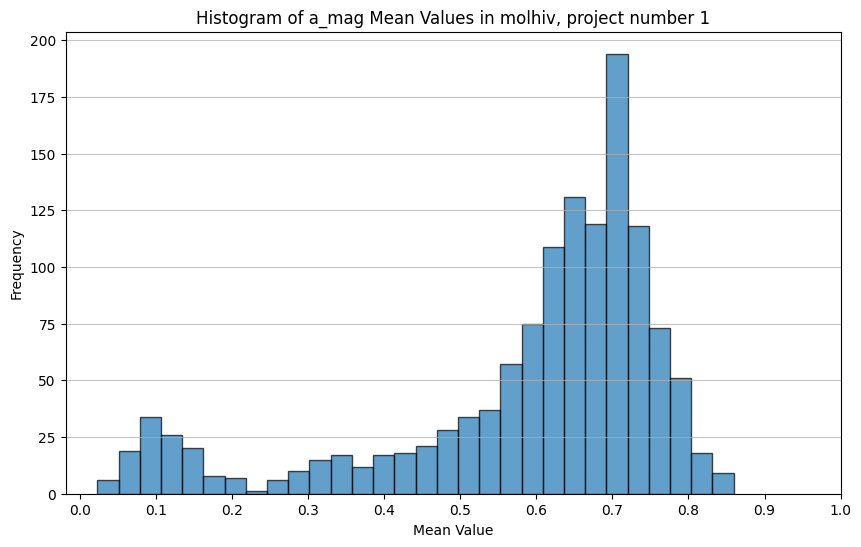

In [39]:
def plot_a_mag_from_parquet(parquet_file="./a_mag_values.parquet", save_path="./a_mag_histogram.png"):
    df = pd.read_parquet(parquet_file)
    
    plt.figure(figsize=(10, 6))
    plt.hist(df['a_mag_mean'], bins=30, edgecolor='black', alpha=0.7)
    plt.title('Histogram of a_mag Mean Values in molhiv, project number 1')
    plt.xlabel('Mean Value')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    
    # Set x-axis ticks from 0 to 1 with 0.1 intervals
    plt.xticks(np.arange(0, 1.1, 0.1))
    
    # Save the plot as an image file
    plt.savefig(save_path, format='png', dpi=300, bbox_inches='tight')
    
    # Display the plot
    plt.show()

plot_a_mag_from_parquet()